In [18]:
import pandas as pd
import numpy as np
from gensim.models import LdaModel, LdaSeqModel
from gensim.corpora.dictionary import Dictionary
from gensim.test.utils import datapath

In [8]:
df = pd.read_parquet('data/combined_clean.parquet')

In [10]:
df.groupby('type').text.count()

type
fomc_statement     195
speech            1455
Name: text, dtype: int64

In [14]:
split_text = df['clean_text'].str.split().values

In [25]:
#dictionary = Dictionary(split_text)
id2word = Dictionary(split_text)
corpus = [id2word.doc2bow(text) for text in split_text]

## Static LDA

In [27]:
lda = LdaModel(corpus=corpus, id2word=id2word, num_topics=10)

In [45]:
lda.print_topics()

[(0,
  '0.011*"rate" + 0.010*"financial" + 0.010*"bank" + 0.008*"market" + 0.008*"policy" + 0.007*"monetary" + 0.006*"risk" + 0.006*"price" + 0.006*"economy" + 0.006*"year"'),
 (1,
  '0.012*"financial" + 0.010*"market" + 0.008*"policy" + 0.007*"economic" + 0.007*"rate" + 0.006*"inflation" + 0.006*"risk" + 0.006*"bank" + 0.005*"business" + 0.005*"price"'),
 (2,
  '0.011*"financial" + 0.011*"risk" + 0.010*"bank" + 0.009*"market" + 0.008*"capital" + 0.005*"policy" + 0.005*"rate" + 0.005*"economic" + 0.005*"firm" + 0.005*"banking"'),
 (3,
  '0.012*"inflation" + 0.011*"rate" + 0.010*"financial" + 0.010*"market" + 0.009*"policy" + 0.008*"bank" + 0.007*"price" + 0.006*"risk" + 0.006*"economic" + 0.006*"monetary"'),
 (4,
  '0.015*"policy" + 0.012*"financial" + 0.010*"bank" + 0.009*"risk" + 0.009*"market" + 0.009*"rate" + 0.008*"inflation" + 0.007*"growth" + 0.006*"monetary" + 0.006*"economy"'),
 (5,
  '0.010*"rate" + 0.009*"market" + 0.008*"inflation" + 0.007*"economic" + 0.006*"year" + 0.006*

In [82]:
lda_topics = pd.concat([pd.DataFrame(dict(lda.get_document_topics(c)), index=[df['date'][i]]) for i, c in enumerate(corpus)]).fillna(0)

<AxesSubplot:>

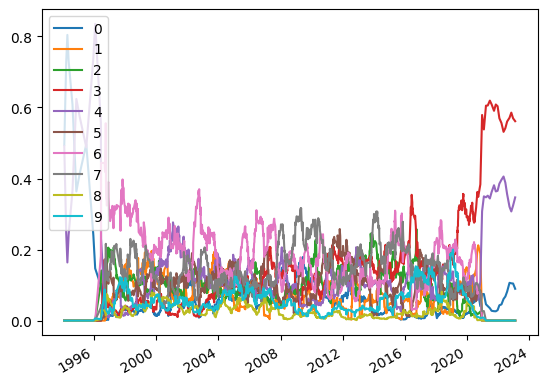

In [83]:
lda_topics.rolling('180d').mean().plot()

## Dynamic LDA

In [93]:
## arbitrarily split it into 5 even chunks
time_slice = [int(i * df.shape[0] / 5) for i in range(1, 5)]

In [99]:
len(id2word)

29348

In [100]:
%%time
ldaseq = LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=time_slice, num_topics=10, lda_model=lda, passes=1)

/opt/anaconda3/envs/cs224n_a3/lib/python3.7/site-packages/gensim/models/ldaseqmodel.py:297: RuntimeWarning: divide by zero encountered in double_scalars
  convergence = np.fabs((bound - old_bound) / old_bound)


KeyboardInterrupt: 